<a href="https://colab.research.google.com/github/Anne340/Real_Estate_Housing_Prediction/blob/main/Real_Estate_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## Specifying the question

We are to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## Defining the matrix for success

## Understanding the context

The matrix for success is seen when we create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## Recording the experimental design

It is done by finding and dealing with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Performing regression analysis.
Incorporate categorical independent variables into your models.
Check for multicollinearity
Provide a recommendation based on your analysis. 
Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
Challenge your solution by providing insights on how you can make improvements in model improvement.

## Relevance of the data

#Loading the dataset

The data provided is relevant to our study



## Importing necessary libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# setting the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

## Read the dataset

In [37]:
# Reading the dataset
house = pd.read_csv('Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
# Getting the shape of the dataset
house.shape

(21613, 20)

In [39]:
# Getting the statistical information on the dataset
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
# Getting the information of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [41]:
# Checking for the unique values
house.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# Cleaning the dataset

In [42]:
# Checking for null values
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
# Checking for duplicates
house.duplicated().sum()

3

In [44]:
# Deleting duplicated data
house.drop_duplicates(inplace=True)
house.duplicated().sum()

0

In [45]:
# Dropping unecessary columns
house = house.drop(['id', 'yr_renovated', 'waterfront', 'condition',	'grade', 'sqft_living15',	'sqft_lot15',	'view'], axis=1)
house.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,98103,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,98146,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,98144,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,98027,47.5345,-122.069
21612,325000.0,2,0.75,1020,1076,2.0,1020,0,2008,98144,47.5941,-122.299


In [46]:
col_names = list(house)
col_names

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long']

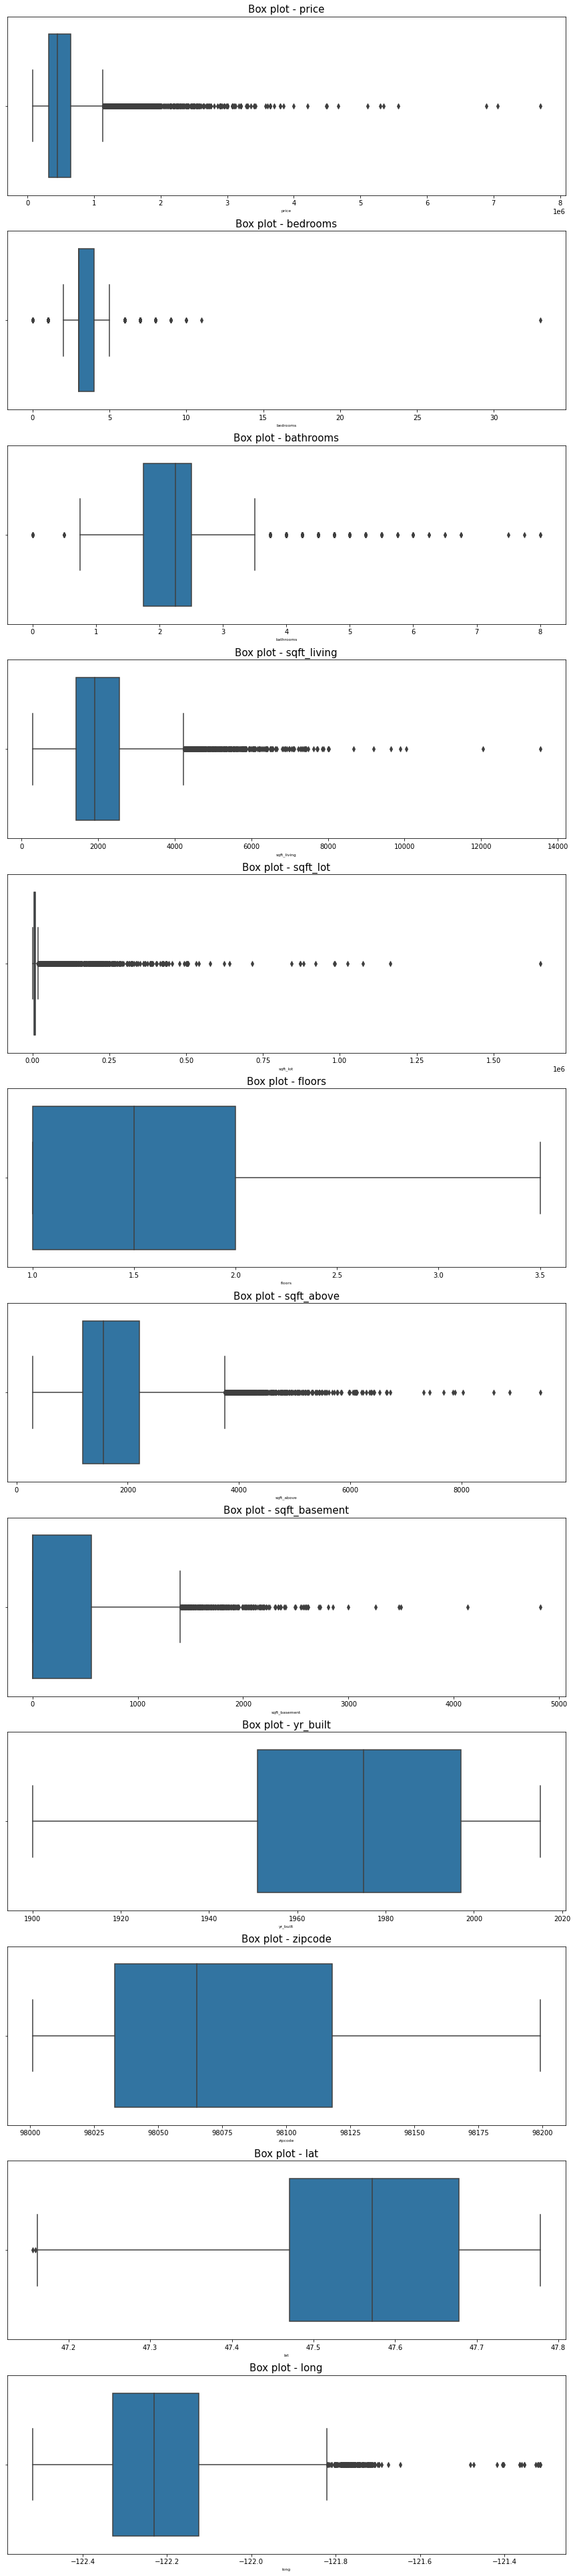

In [47]:
# Checking for outliers
col_names = list(house)

fig, ax = plt.subplots(len(col_names), figsize=(15, 70))

for i, col_val in enumerate(col_names):
    sns.boxplot(house[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=15)
    ax[i].set_xlabel(col_val, fontsize=6)
plt.show()

In [48]:
# Dealing with outliers

Q1 = house[col_names].quantile(0.25)
Q3 = house[col_names].quantile(0.75)
IQR = Q3 - Q1

outliers = house[~((house[col_names] < (Q1 - 1.5 * IQR)) |(house[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [49]:
print('There are {} outliers in the dataset.'.format(
        outliers.shape[0]))
print('The percentage of outliers in the dataset is {}%.'.format(
        round((outliers.shape[0] / house.shape[0]) * 100, 2)))

There are 17297 outliers in the dataset.
The percentage of outliers in the dataset is 80.04%.


We will not drop the outliers in the dataset since it is a big chunck of the data provided

In [50]:
house.shape

(21610, 12)

# Univariate Analysis

In [51]:
house.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,98125,47.7210,-122.319


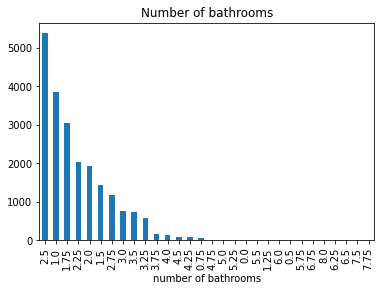

In [52]:
#Histogram showing number of bathrooms
house.bathrooms.value_counts().plot.bar(title = "Number of bathrooms")
plt.xlabel('number of bathrooms')
plt.show()

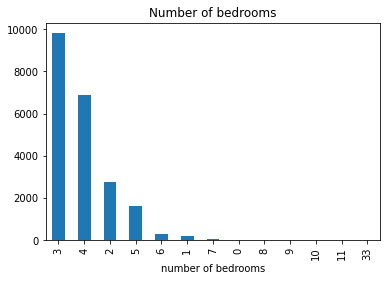

In [53]:
#Histogram showing number of bedrooms
house.bedrooms.value_counts().plot.bar(title = "Number of bedrooms")
plt.xlabel('number of bedrooms')
plt.show()

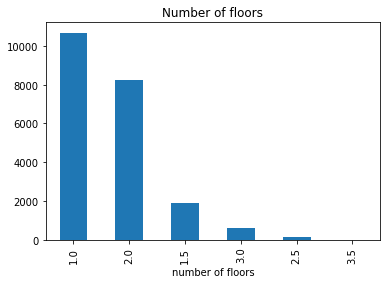

In [54]:
#Histogram showing number of floors
house.floors.value_counts().plot.bar(title = "Number of floors")
plt.xlabel('number of floors')
plt.show()

# Bivariate Analysis

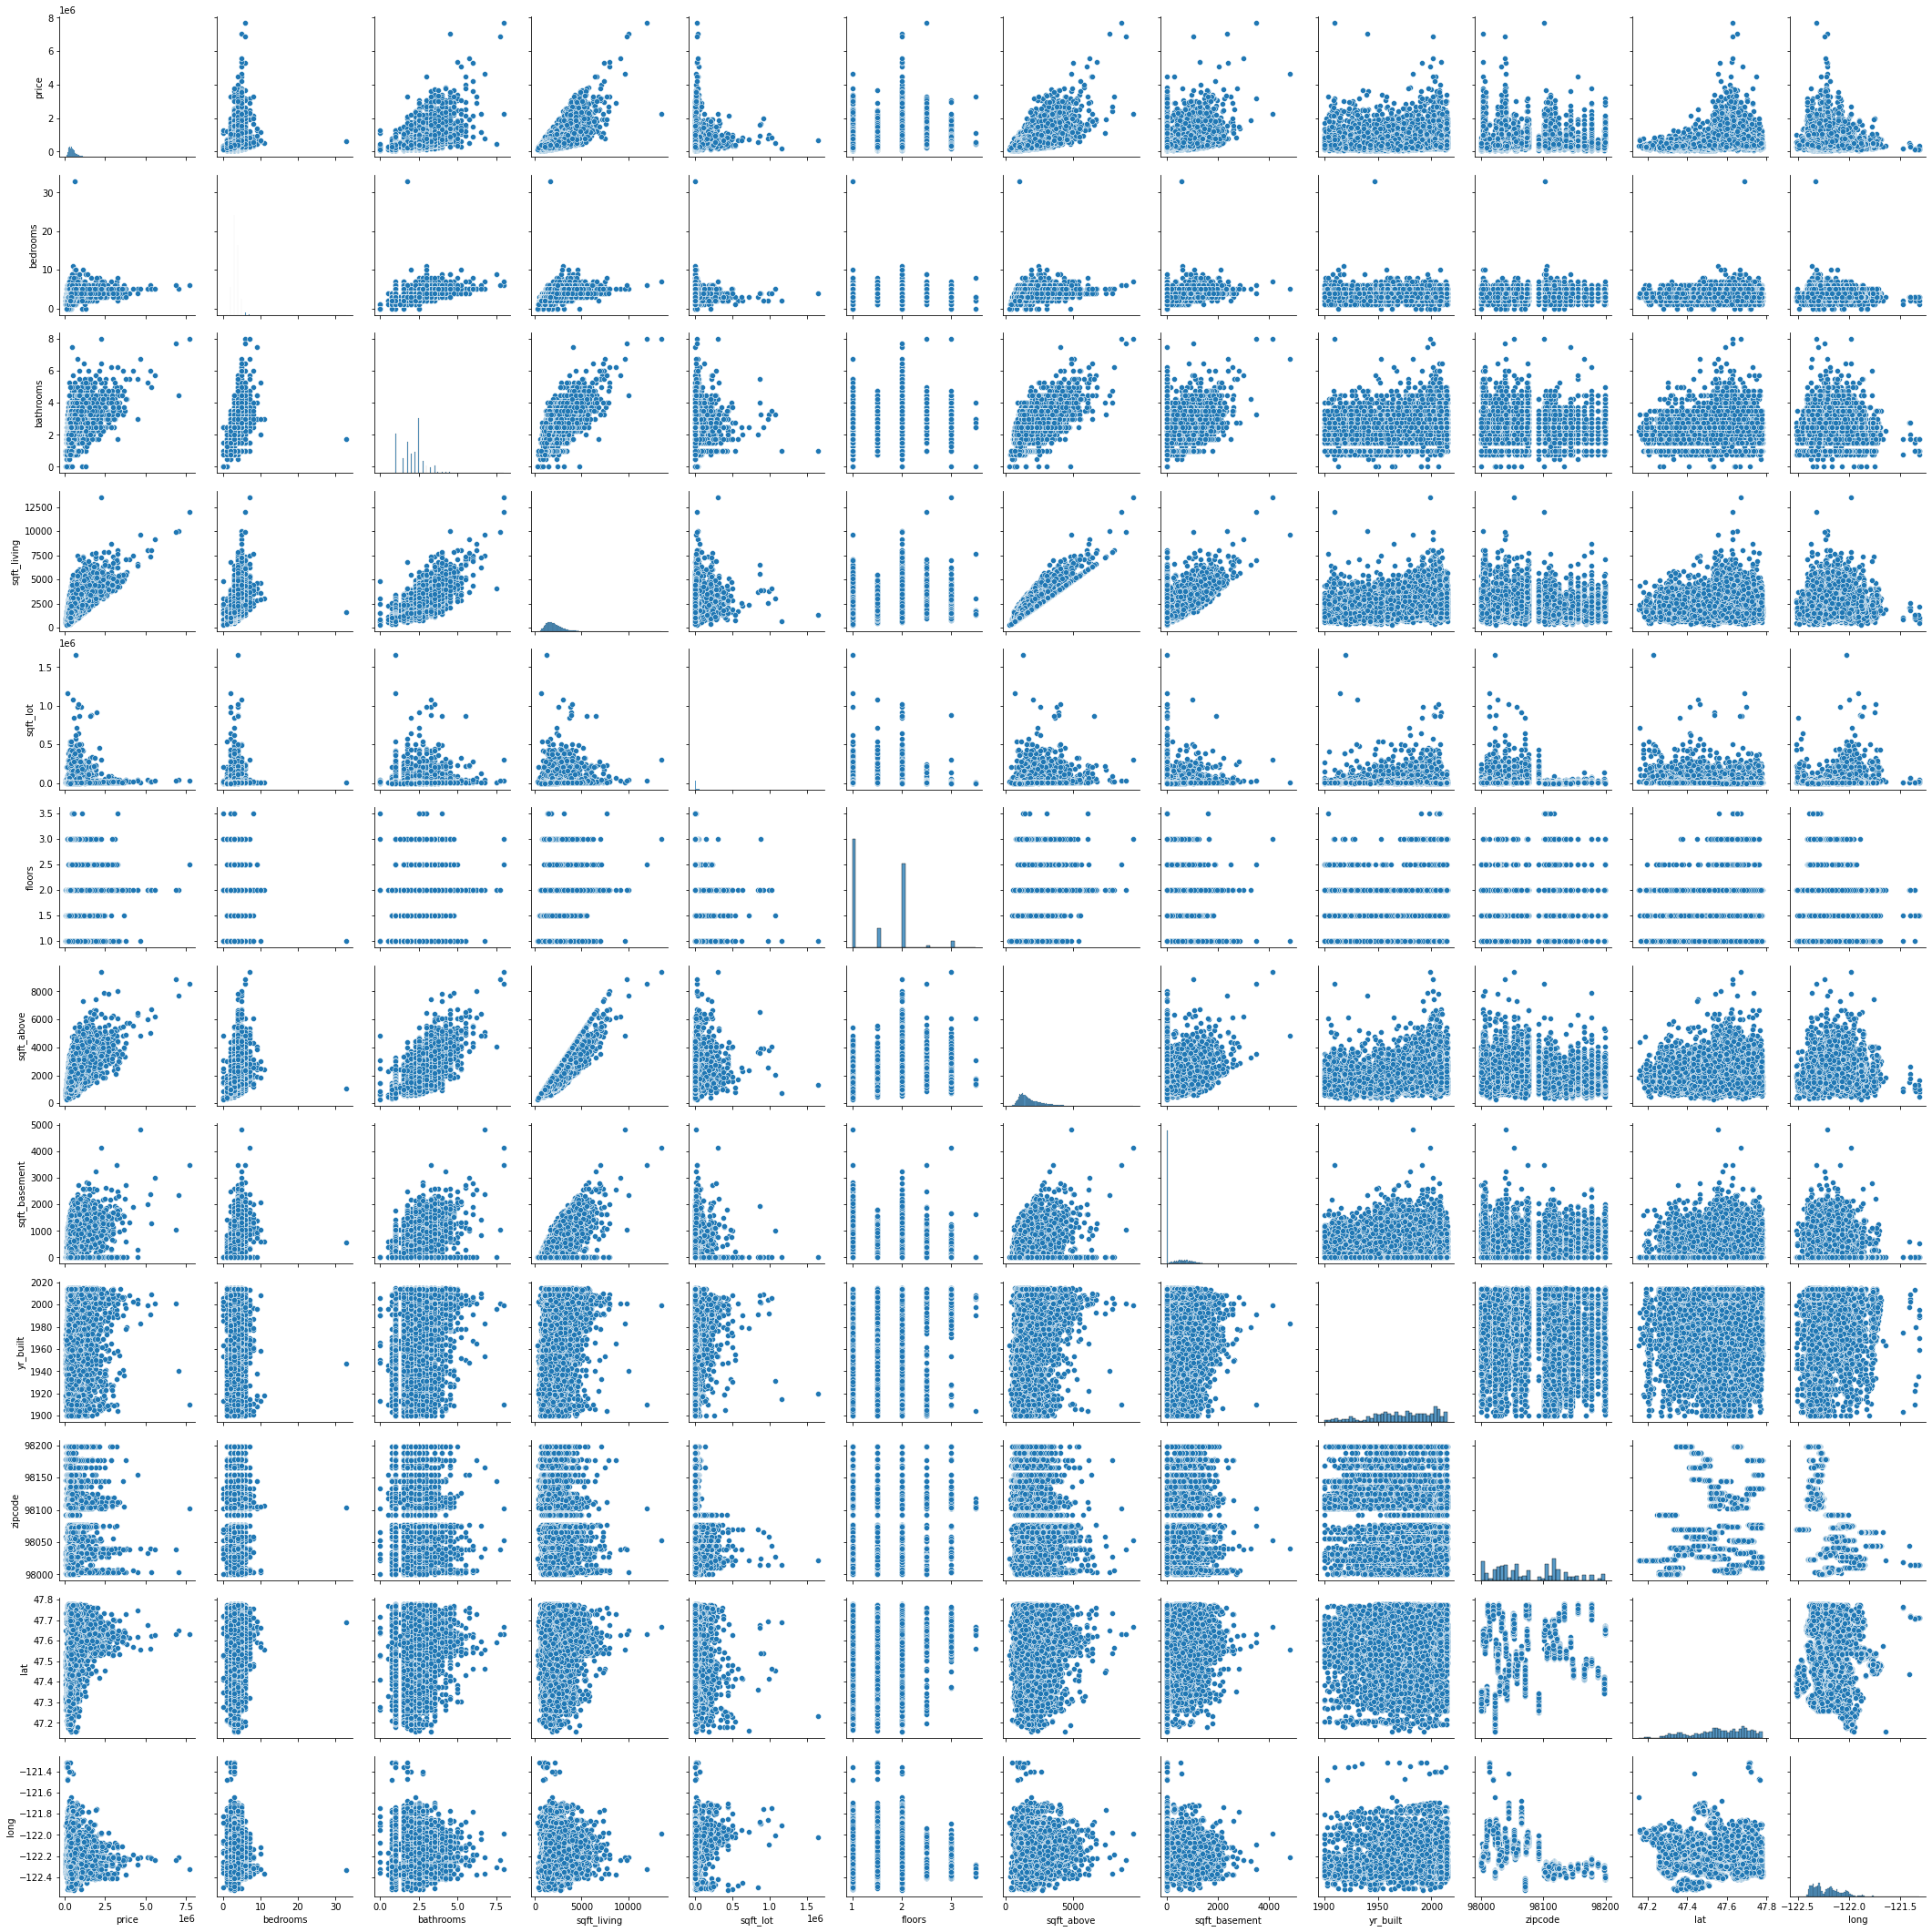

In [55]:
# Plotting pairplots to visualize the data
sns.pairplot(house)

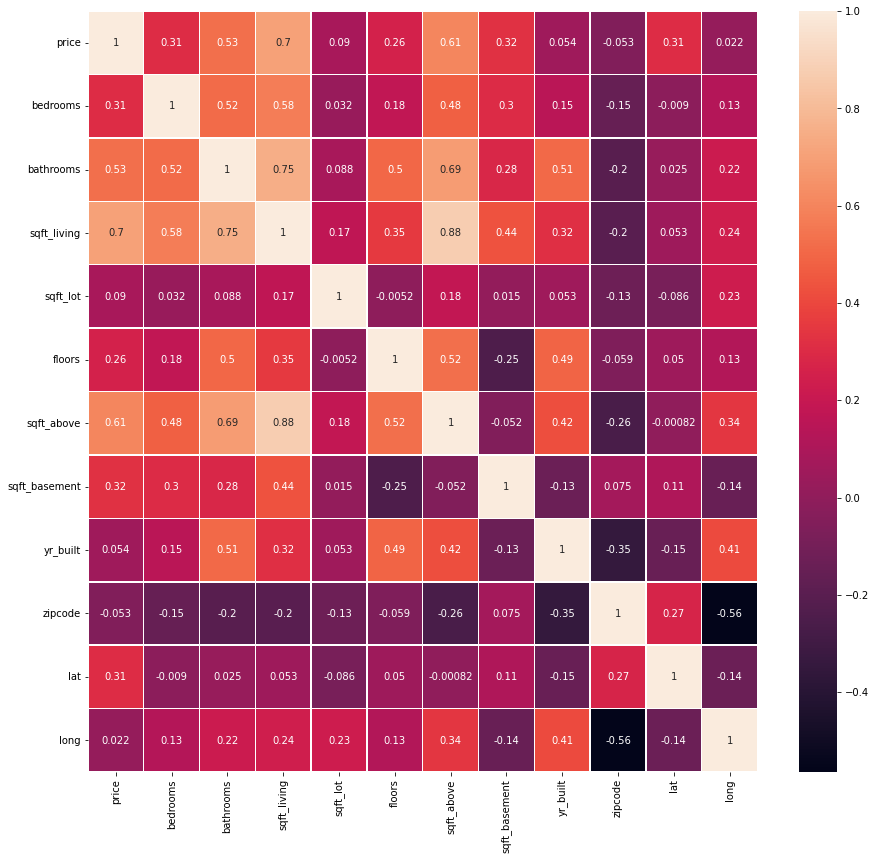

In [56]:
# Plotting a heatmap matrix to show correlation of the data
correlation = house.corr()

fig, ax = plt.subplots(figsize=(15,14)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax)
plt.show()

In [57]:
house.shape

(21610, 12)

# Multivariate analysis

# Linear Discriminant Analysis

In [58]:
house.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1.0,1180,5650,1.0,1180,0,1955,98178,47.5112,-122.257


In [59]:
# # Divide the dataframe into the dependent and independent variables
# X = house.drop(['price'], axis=1)
# y = house['price']

In [60]:
# # Divide the data into train and test data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [61]:
# # Feature scaling
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [62]:
# # Perform LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA()
# X_train_lda = lda.fit_transform(X_train, y_train)
# X_test_lda = lda.transform(X_test)

In [63]:
# # Training and making predictions
# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier.fit(X_train_lda, y_train)
# y_pred = classifier.predict(X_test_lda)
# y_pred

In [64]:
# # Evaluating the Performance


# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# confusion_matrix(y_test, y_pred)
# print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

# Multicollinearity

In [65]:
house.shape

(21610, 12)

In [66]:
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = house.drop(columns=['price'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,0.477619,0.303077,0.154276,-0.152721,-0.008953,0.129474
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.685351,0.283814,0.505997,-0.203831,0.024590,0.223047
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.876600,0.435054,0.318099,-0.199435,0.052521,0.240221
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.183527,0.015271,0.053105,-0.129611,-0.085680,0.229552
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.523874,-0.245673,0.489347,-0.059025,0.049593,0.125343
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,1.000000,-0.051923,0.423922,-0.261163,-0.000823,0.343791
sqft_basement,0.303077,0.283814,0.435054,0.015271,-0.245673,-0.051923,1.000000,-0.133062,0.074781,0.110535,-0.144743
yr_built,0.154276,0.505997,0.318099,0.053105,0.489347,0.423922,-0.133062,1.000000,-0.346808,-0.148099,0.409395
zipcode,-0.152721,-0.203831,-0.199435,-0.129611,-0.059025,-0.261163,0.074781,-0.346808,1.000000,0.267064,-0.564069
lat,-0.008953,0.024590,0.052521,-0.085680,0.049593,-0.000823,0.110535,-0.148099,0.267064,1.000000,-0.135545


In [67]:
# Checking the VIF scores
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.584507,-0.424850,-6.520843e-02,0.111622,0.072316,-5.251627e-01,-3.296088e-01,0.174895,0.082521,0.073210,-0.009686
bathrooms,-0.424850,3.254954,-8.730106e-01,0.022739,-0.713119,-6.174953e-01,-7.239600e-01,-0.820321,0.060956,-0.047696,0.088051
sqft_living,-0.092573,-0.820387,2.229226e+14,-0.083752,-0.016306,-2.009916e+14,-1.074195e+14,-0.159898,0.188828,-0.150119,-0.018182
sqft_lot,0.111622,0.022739,-8.186021e-02,1.100992,0.086961,-2.059415e-01,-4.192550e-02,0.077514,-0.024870,0.085780,-0.232802
floors,0.072316,-0.713119,-1.059515e-02,0.086961,1.960684,-4.555913e-01,6.304113e-01,-0.509119,-0.194835,-0.135777,0.215237
sqft_above,-0.508765,-0.644514,-2.009916e+14,-0.204472,-0.450684,1.812182e+14,9.685160e+13,0.296727,-0.076080,0.054206,-0.317567
sqft_basement,-0.322123,-0.742828,-1.074195e+14,-0.040918,0.637516,9.685160e+13,5.176210e+13,0.287995,-0.127329,-0.064333,0.172060
yr_built,0.174895,-0.820321,-1.544416e-01,0.077514,-0.509119,2.918072e-01,2.853660e-01,1.878946,0.218329,0.191340,-0.435712
zipcode,0.082521,0.060956,1.984643e-01,-0.024870,-0.194835,-8.476808e-02,-1.319722e-01,0.218329,1.612535,-0.285836,0.749670
lat,0.073210,-0.047696,-1.514065e-01,0.085780,-0.135777,5.536743e-02,-6.371203e-02,0.191340,-0.285836,1.124712,-0.080514


In [68]:
# Dropping values with VIF scores above 5
revised = independent_only.drop(columns=['sqft_basement', 'sqft_living'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long
bedrooms,1.504897,-0.671921,0.093978,0.209004,-0.467889,0.220688,0.074633,0.043541,0.025763
bathrooms,-0.671921,2.488172,-0.032017,-0.288911,-0.998297,-0.678205,0.036474,-0.139772,0.198067
sqft_lot,0.093978,-0.032017,1.097082,0.117254,-0.252428,0.087663,-0.026619,0.079205,-0.224946
floors,0.209004,-0.288911,0.117254,1.725999,-0.678875,-0.587742,-0.181291,-0.084838,0.154373
sqft_above,-0.467889,-0.998297,-0.252428,-0.678875,2.436906,0.081037,0.106492,-0.034805,-0.389327
yr_built,0.220688,-0.678205,0.087663,-0.587742,0.081037,1.852607,0.222866,0.208405,-0.456103
zipcode,0.074633,0.036474,-0.026619,-0.181291,0.106492,0.222866,1.611754,-0.288776,0.753182
lat,0.043541,-0.139772,0.079205,-0.084838,-0.034805,0.208405,-0.288776,1.113655,-0.067304
long,0.025763,0.198067,-0.224946,0.154373,-0.389327,-0.456103,0.753182,-0.067304,1.721070


# Multiple Linear Regression

In [69]:
# Import necessary libraries
from sklearn import linear_model

# Divide the dataframe into the dependent and independent variables
X = house.iloc[:, 1:-1].values
y = house.iloc[:, -1].values


In [70]:
# Divide the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [71]:
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
linear.describe()

,Actual,Predicted
count,4322.000000,4322.000000
mean,-122.213179,-122.215360
std,0.144247,0.091420
min,-122.509000,-122.457508
25%,-122.330000,-122.297766
50%,-122.234500,-122.193017
75%,-122.121250,-122.143721
max,-121.315000,-121.699716


In [72]:
# Checking the accuracy
print("The Accuracy is :",regressor.score(X_test, y_test )* 100)

The Accuracy is : 42.6868602159051


In [73]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07897592295335307
Mean Squared Error: 0.011922559855229605
Root Mean Squared Error: 0.1091904751122075


# Heteroskedacity Test

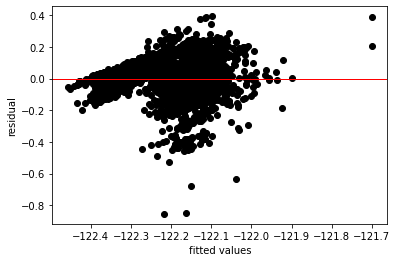

In [74]:
residuals = y_pred - y_test
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This graph indicates there there os multicollinearity in the data

# Quantile Regression

In [75]:
house.shape

(21610, 12)

In [76]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

In [77]:
# Splitting data into the feature and target
X1 = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long']]
y1 = house['price']

In [78]:
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y1 ~ X1', house)
res = mod.fit(q = 0.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y1   Pseudo R-squared:               0.3987
Model:                       QuantReg   Bandwidth:                   2.203e+04
Method:                 Least Squares   Sparsity:                    2.972e+05
Date:                Mon, 25 Apr 2022   No. Observations:                21610
Time:                        05:07:02   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    264.3570      3.142     84.135      0.000     258.198     270.516
X1[0]      -3.916e+04   1363.840    -28.709      0.000   -4.18e+04   -3.65e+04
X1[1]       4.545e+04   2367.447     19.197      0.000    4.08e+04    5.01e+04
X1[2]        181.0120      2.956     61.232      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


# Ridge Regression

In [79]:
# Divide the dataframe into the dependent and independent variables
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above',  'yr_built', 'zipcode', 'lat', 'long']]
y = house['price']

# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [81]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [82]:
ridge_reg.score(X_test, y_test)

0.6393474660240916

In [83]:
from sklearn import metrics
metrics.mean_squared_error(y_test, ridge_reg.predict(X_test))

47397023857.773926

# Lasso Regression

In [84]:
# Import necessary libraries
from sklearn import linear_model

# Divide the dataframe into the dependent and independent variables
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long']]
y = house['price']

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [87]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.639345218233608

In [88]:
from sklearn import metrics
metrics.mean_squared_error(y_test, lasso_reg.predict(X_test))

47397319262.82211

# Elastic Net Regression

In [89]:
# Importing our libraries
# 
import numpy as np
import pandas as pd


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [90]:
# Preparing our dataset
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long']]
y = house['price']

In [91]:
# Modelling the train and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
                                                    

In [92]:
enet_model = ElasticNet(normalize=True).fit(X_train, y_train)

In [93]:
# Finding the variable coefficients
enet_model.coef_

array([ 1.45182612e+01,  3.04822696e+01,  3.42741054e-02,  9.93750048e-05,
        2.13368641e+01,  3.26685117e-02,  3.35130026e-02,  8.74439911e-02,
       -4.32949844e-02,  1.00157397e+02,  8.23940850e+00])

In [94]:
# Finding the constant of the elastic net regression model
enet_model.intercept_

539459.5046940465

In [95]:
# MSE Value
y_pred = enet_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

370107.01695579663

In [96]:
enet_model.score(X_test, y_test)

0.00030129557617764036